# Term Project

## Members
- Dherya Jain
- Lidia Rodionova
- Joubin Najmaie


## Project Objective
To predict the overall building evaluation score based on characteristics such as building age, ward, and property type features, in order to proactively identify buildings at risk of poor compliance or requiring inspection.

## High Level Steps
- Hypothesis Test 1 - YEAR BUILT vs. Building Score
- Hypothesis Test 2 - WARD vs. Building Score
- Hypothesis Test 3 - PROPERTY TYPE vs. Building Score

## Dataset
City of Toronto - Apartment Building Evaluation
https://open.toronto.ca/dataset/apartment-building-evaluation/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

def plotDist(df, title, xlabel, ylabel):
    # Plot the distribution
    plt.figure(figsize=(7, 4))
    plt.hist(df, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
# upload data into DataFrame
apartmentEvalDf = pd.read_csv("Apartment Building Evaluations 2023 - current.csv", encoding='latin-1')
apartmentEvalDf.head(2)

,_id,RSN,YEAR REGISTERED,YEAR BUILT,YEAR EVALUATED,PROPERTY TYPE,WARD,WARDNAME,SITE ADDRESS,CONFIRMED STOREYS,...,CLEANING LOG,VITAL SERVICE PLAN,ELECTRICAL SAFETY PLAN,STATE OF GOOD REPAIR PLAN,TENANT SERVICE REQUEST LOG,GRID,LATITUDE,LONGITUDE,X,Y
0,1,4897867,2021.0,2020.0,2023,PRIVATE,11,University-Rosedale,99 GERRARD ST W,32,...,3,3,3,3,3,S1145,NaN,NaN,313970.923,4835138.057
1,2,4153580,2017.0,1930.0,2023,PRIVATE,13,Toronto Centre,26 GIFFORD ST,4,...,3,3,3,3,3,S1327,43.663338,-79.363691,315777.607,4835719.536


In [17]:
apartmentEvalDf.describe()

,YEAR BUILT,WARD,CONFIRMED STOREYS,CONFIRMED UNITS,CURRENT BUILDING EVAL SCORE,PROACTIVE BUILDING SCORE,CURRENT REACTIVE SCORE,NO OF AREAS EVALUATED,NUMBERING OF PROPERTY,EXTERIOR GROUNDS,...,INT. HANDRAIL / GUARD - SAFETY,INT. HANDRAIL / GUARD - MAINT.,GRAFFITI,BUILDING CLEANLINESS,COMMON AREA PESTS,VITAL SERVICE PLAN,ELECTRICAL SAFETY PLAN,STATE OF GOOD REPAIR PLAN,AGE,PROPERTY_TYPE_NUMERIC
count,3556.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3535.000000,...,3567.000000,3567.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3556.000000,3573.000000
mean,1962.163105,11.122866,7.774699,89.815001,87.177470,87.315169,-0.137699,41.215505,2.877974,2.635078,...,2.495655,2.567704,2.797089,2.600616,2.925553,2.537643,2.276518,2.522530,62.836895,1.252169
std,20.196624,6.306360,6.491221,97.334050,8.769671,8.675852,0.650663,3.674846,0.389100,0.585442,...,0.838916,0.604572,0.518928,0.640435,0.333043,0.886976,0.988285,0.890323,20.196624,0.612440
min,1805.000000,1.000000,3.000000,10.000000,17.000000,17.000000,-20.000000,27.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1955.000000,5.000000,3.000000,23.000000,83.000000,83.000000,0.000000,38.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,1.000000,3.000000,55.000000,1.000000
50%,1962.000000,12.000000,4.000000,50.000000,89.000000,89.000000,0.000000,42.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,63.000000,1.000000
75%,1970.000000,16.000000,10.000000,125.000000,93.000000,93.000000,0.000000,44.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,70.000000,1.000000
max,2023.000000,25.000000,51.000000,793.000000,100.000000,100.000000,0.000000,49.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,220.000000,3.000000


Drop columns that will not be used for modeling

In [5]:
colsToDrop = [
    '_id',
    'RSN',
    'GRID',
    'LATITUDE',
    'YEAR REGISTERED',
    'YEAR EVALUATED',
    'EVALUATION COMPLETED ON',
    'LONGITUDE',
    'X',
    'Y',
    'WARDNAME',
    'SITE ADDRESS',
    'TENANT NOTIFICATION BOARD',
    'PEST CONTROL LOG',
    'MAINTENANCE LOG',
    'CLEANING LOG',
    'TENANT SERVICE REQUEST LOG'
    ]

apartmentEvalDf.drop(colsToDrop, axis=1, errors='ignore', inplace=True)

In [6]:
from datetime import datetime
current_year = datetime.now().year

# Add a new column called 'age' (current year - year column)
apartmentEvalDf['AGE'] = current_year - apartmentEvalDf['YEAR BUILT']

In [7]:
apartmentEvalDf['PROPERTY_TYPE_NUMERIC'] = apartmentEvalDf['PROPERTY TYPE'].map({
    'PRIVATE': 1,
    'SOCIAL HOUSING': 2,
    'TCHC': 3
})

In [18]:
apartmentEvalDf.head(5)

,YEAR BUILT,PROPERTY TYPE,WARD,CONFIRMED STOREYS,CONFIRMED UNITS,CURRENT BUILDING EVAL SCORE,PROACTIVE BUILDING SCORE,CURRENT REACTIVE SCORE,NO OF AREAS EVALUATED,NUMBERING OF PROPERTY,...,INT. HANDRAIL / GUARD - SAFETY,INT. HANDRAIL / GUARD - MAINT.,GRAFFITI,BUILDING CLEANLINESS,COMMON AREA PESTS,VITAL SERVICE PLAN,ELECTRICAL SAFETY PLAN,STATE OF GOOD REPAIR PLAN,AGE,PROPERTY_TYPE_NUMERIC
0,2020.0,PRIVATE,11,32,275,98.0,98.0,0,46,3,...,3.0,3.0,3,3,3,3,3,3,5.0,1
1,1930.0,PRIVATE,13,4,15,93.0,93.0,0,36,3,...,3.0,1.0,3,3,3,3,3,3,95.0,1
2,1960.0,PRIVATE,9,3,29,75.0,75.0,0,37,3,...,1.0,2.0,3,3,3,1,1,1,65.0,1
3,1960.0,PRIVATE,9,3,23,80.0,80.0,0,37,3,...,1.0,3.0,3,3,3,1,1,1,65.0,1
4,1954.0,PRIVATE,21,14,192,89.0,89.0,0,44,3,...,3.0,3.0,3,2,3,3,3,1,71.0,1


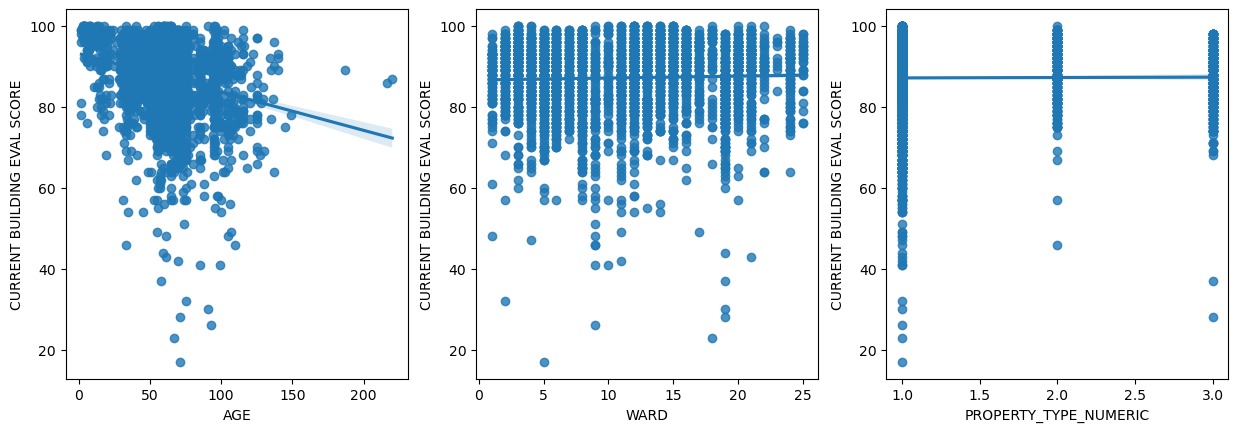

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_figwidth(15)

ax1 = sns.regplot(x=apartmentEvalDf['AGE'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'], ax=ax1)
ax2 = sns.regplot(x=apartmentEvalDf['WARD'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'], ax=ax2)
ax3 = sns.regplot(x=apartmentEvalDf['PROPERTY_TYPE_NUMERIC'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'])

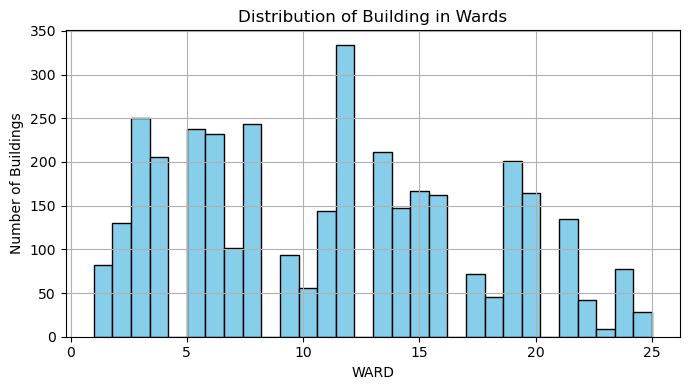

In [11]:
plotDist(apartmentEvalDf['WARD'].dropna(), 'Distribution of Building in Wards', 'WARD', 'Number of Buildings')

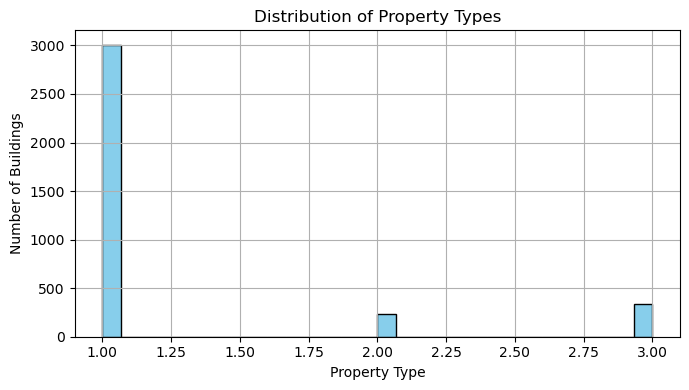

In [12]:
plotDist(apartmentEvalDf['PROPERTY_TYPE_NUMERIC'].dropna(), 'Distribution of Property Types', 'Property Type', 'Number of Buildings')

In [13]:
# Calculate the mean of YEAR BUILT and CURRENT BUILDING EVAL SCORE,
# dropping rows where either value is missing
mean_values = apartmentEvalDf[['AGE', 'CURRENT BUILDING EVAL SCORE']].dropna().mean()
mean_values

AGE                            62.836895
CURRENT BUILDING EVAL SCORE    87.218251
dtype: float64

In [14]:
stddev_values = apartmentEvalDf[['AGE', 'CURRENT BUILDING EVAL SCORE']].dropna().std()
stddev_values

AGE                            20.196624
CURRENT BUILDING EVAL SCORE     8.736644
dtype: float64

# Hypothesis Test 1 - YEAR BUILT vs. Building Score

Test whether older or newer buildings have different average evaluation scores.

Goal: Test whether older or newer buildings have different average evaluation scores.

- H0: There is no relationship between year built and building score.
- H1: There is a statistically significant relationship between year built and building score.


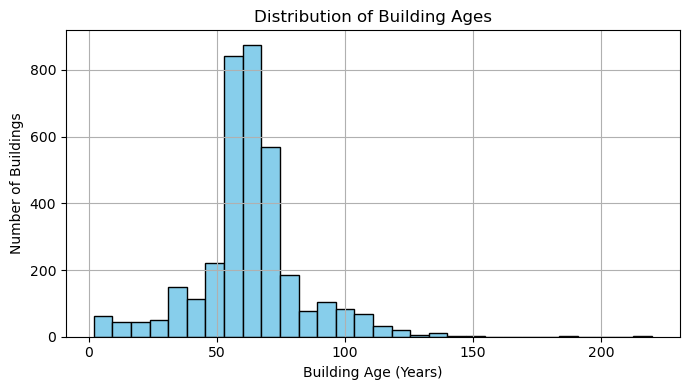

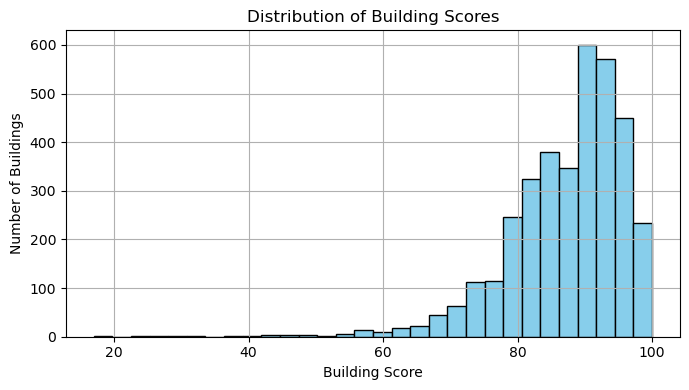

In [15]:
# Plot building ages
plotDist(apartmentEvalDf['AGE'].dropna(), 'Distribution of Building Ages', 'Building Age (Years)', 'Number of Buildings')
# plotDist(apartmentEvalDf['YEAR BUILT'].dropna(), 'Distribution of Building Ages', 'Building Age (Years)', 'Number of Buildings')
plotDist(apartmentEvalDf['CURRENT BUILDING EVAL SCORE'].dropna(), 'Distribution of Building Scores', 'Building Score', 'Number of Buildings')


Assuming that the null-hypothesis is true, calculate the p-value to get the probability of getting extreme values as the ones observed.

In [16]:
from scipy.stats import pearsonr

# Drop rows with missing values
valid_data = apartmentEvalDf[['AGE', 'CURRENT BUILDING EVAL SCORE']].dropna()
corr, p_value = pearsonr(valid_data['AGE'], valid_data['CURRENT BUILDING EVAL SCORE'])
print(f"Correlation: {corr:.3f}")
print(f"p-value: {p_value:.3g}")


Correlation: -0.219
p-value: 4.83e-40


## Conclusion

The observed data is unlikely under H0​, therefore reject the null hypothesis

# Hypothesis Test 2 - WARD vs. Building Score

Test whether buildings in different wards have different average scores.

Goal: Test whether buildings in different wards have different average scores.

- H0: The average building score is the same across all wards.
- H1: At least one ward has a different average building score.

# Hypothesis Test 3 - PROPERTY TYPE vs. Building Score

Determine if the average building score differs by property type (e.g. PRIVATE, TCHC, etc.)

Goal: Determine if the average building score differs by property type (e.g. PRIVATE, TCHC, etc.)

- H0: The mean building score is the same across all property types.
- H1: At least one property type has a different mean building score.